This version use the native approach. 
We use the feedback (set of 3 colors: green, yellow, grey) to reduce the list of allowed words(13k words) then give randomly the guess for the next step <br />
CONVENTION: <br />
Guess: The word suggested by the programming  <br />
Feedback: The set of 3 colours: green, yellow, grey represented by 2,1,0 respectively  <br />
Answer: The final answer of game or the word to check the guess then give the feedback <br />
Possible answer: words could be real answer. It is quiet same 'guess' in Hardmode

In [8]:
with open('allowed_guesses.txt','r') as file:
    allowed_guesses=[]
    for i in file:
        allowed_guesses.append(i[:5])
with open("real_possible_answers.txt","r") as file:
        real_possible_answers=[]
        for i in file:
            real_possible_answers.append(i[:5])


In [1]:
def get_feedback(guess:str,answer:str) -> list: 
    """
    get_feeback
    ----------
    guess: Five-letter guess.
    answer: Five-letter correct answer.
    Returns: Feedback contains 05 elements, which can be 0, 1, or 2, denoting a feedback pattern
    """
    # convert string to list
    answer = list(answer)
    guess = list(guess)
    
    #initialize
    feedback = ['']*5
    
    # isolate correctly placed letters
    for i in range(5):
        if guess[i] == answer[i]:
            feedback[i] = 2
            answer[i] = ''
            guess[i] = ''

    for i in range(5):
        if guess[i] == '': continue
        try:
            index=answer.index(guess[i])
            feedback[i] = 1
            answer[index] = ''
            guess[i] = ''
        except:
            feedback[i]=0
    return feedback

get_feedback('speed','crepe')

[0, 1, 2, 1, 0]

In [10]:
def reduce_list(guess:str,feedback:list,word_list:list) ->list:
    '''This function return the reduced allowed word list which have real answer
    
    guess: the word we guessed in this step
    feedback: the pattern given by game
    word_list: allowed list in the first step and the reduced list in the next steps
    '''
    return [word for word in word_list if get_feedback(guess,word)==feedback]

SOLUTION fuction (may be and solution for test)

In [11]:
import random
def solution(answer,input=False):
    '''This function return the number of step in this play\n
    answer: The secret word of the game
    input : True is feedback inputted from terminal and vice versa
    '''
    word_list=allowed_guesses
    k=0
    while True:
        k+=1
        guess=random.choice(word_list)
        if input:
            feedback=[int(i) for i in str(input())]
        else:
            feedback=get_feedback(guess,answer)
        if feedback==[2]*5:
            break
        word_list=reduce_list(guess,feedback,word_list)
    return k
print(solution('cutes'))

4


TEST

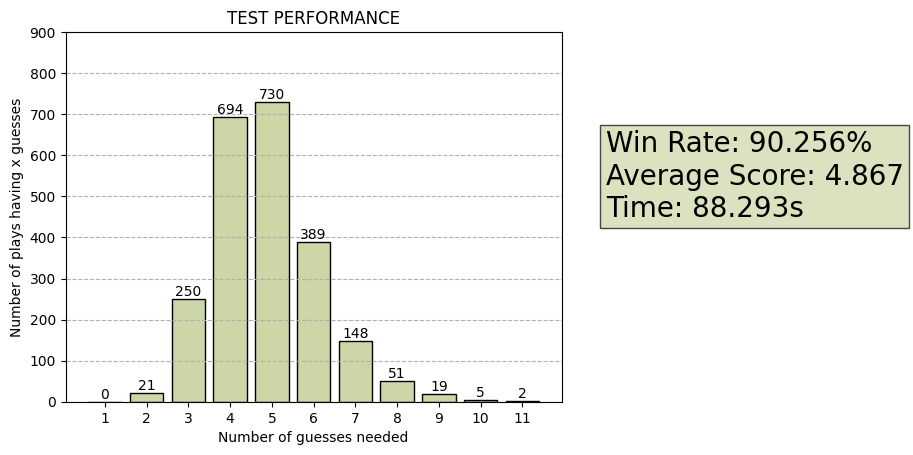

(90.2555218709398, 4.867475097444781)

In [16]:
def TestModel(solution,test_list:list,RANDOM=False) -> tuple:
    '''
    Parameter
    ----------
    solution: The function return the number of step to guess a specific answer \n
    test_list: The list of answers for testing
    RANDOM: False, answer is chosen randomly and True, answer is chosen sequentially from the test_list
    ----------
    Return: The bar chart with x(number of guesses needed) and y (number of plays having x guesses) \n
                  The tupple of winrate and average score'''
    import random
    import time
    t1=time.time()
    #Compute some vital factor: number of plays having x guesses, win rate, average score of 2,3k plays   
    xMax=20 # may be posituve infinity number
    yMax=0
    lst=[0]*xMax
    N=len(test_list)# list contains number of plays having x guesses
    for word in test_list:
        if not RANDOM:
            answer=word
        elif RANDOM:
            answer=random.choice(test_list)
        NumberOfGuessesNeeded=solution(answer) 
        lst[NumberOfGuessesNeeded]=lst[NumberOfGuessesNeeded]+1
    winrate=sum(lst[1:7])/N*100
    average=sum([i*lst[i] for i in range(1,xMax)]) / N

    #VISUALIZATION
    import matplotlib.pyplot as plt
    for i in range(1,xMax):
        if lst[i] >=yMax: # because yMax always in (1,6)
            yMax=lst[i]
        if lst[i]==0 and i>6:
            xMax=i
            break
    yMax=(yMax//100+2)*100
    x=[str(i) for i in range(1,xMax)]
    y=[i for i in lst[1:xMax]]
    plt.ylim(0,yMax)
    plt.grid(axis='y',linestyle='--')
    plt.xlabel('Number of guesses needed')
    plt.ylabel('Number of plays having x guesses')
    plt.title('TEST PERFORMANCE')
    plt.bar(x,y, fc="#CCD6A6", ec="black")
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha="center", va="bottom")
    t2=time.time()
    time=t2-t1
    plt.text(xMax,yMax/2, f'Win Rate: {winrate:.3f}%\nAverage Score: {average:.3f}\nTime: {time:.3f}s', fontsize = 20,
		bbox = dict(facecolor = '#CCD6A6', alpha = 0.7))
    plt.show()
    return winrate,average

TestModel(solution,real_possible_answers)
        


33.8s - 0.014s
winrate=0.8925941966219142
average=4.889129493287137

winrate=90.29883066262451%
average=4.886530965786054

winrate=88.99956691208315%
average=4.911650064963188
